# Phase 2 - Week 1 - Day 3 AM - Computer Vision - CNN Example

In this notebook, we will classify fresh fruits and rotten fruits.

In [ ]:
from google.colab import files
!pip install -q kaggle
!wget https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3AM%20-%20Computer%20Vision%20-%20kaggle.json -O kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json
import matplotlib.pyplot as plt
import numpy as np
import glob

--2023-09-11 06:20:55--  https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w4/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      74  --.-KB/s    in 0s      

2023-09-11 06:20:55 (4.07 MB/s) - ‘kaggle.json’ saved [74/74]

kaggle.json
total 4
-rw------- 1 root root 74 Sep 11 06:20 kaggle.json
{"username":"fahmiimanalfarizki","key":"47da5e900d616ba7923f8edb186a93c4"}

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [03:11<00:00, 19.4MB/s]
100% 3.58G/3.58G [03:11<00:00, 20.1MB/s]


In [ ]:
!unzip -q /content/fruits-fresh-and-rotten-for-classification.zip

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

train_gen = train_datagen.flow_from_directory(
	"/content/dataset/train/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=False
)
test_gen = test_datagen.flow_from_directory(
	"/content/dataset/test/",
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126,
	shuffle=False
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
print(train_gen.class_indices)
print(test_gen.class_indices)

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}


In [ ]:
np.random.randint(len(train_gen.next()[0]), size=16)

array([  7,   2, 123,  92,   4,  33, 104,  18,   5,  26, 108,  35,  63,
       111,  46,  32])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


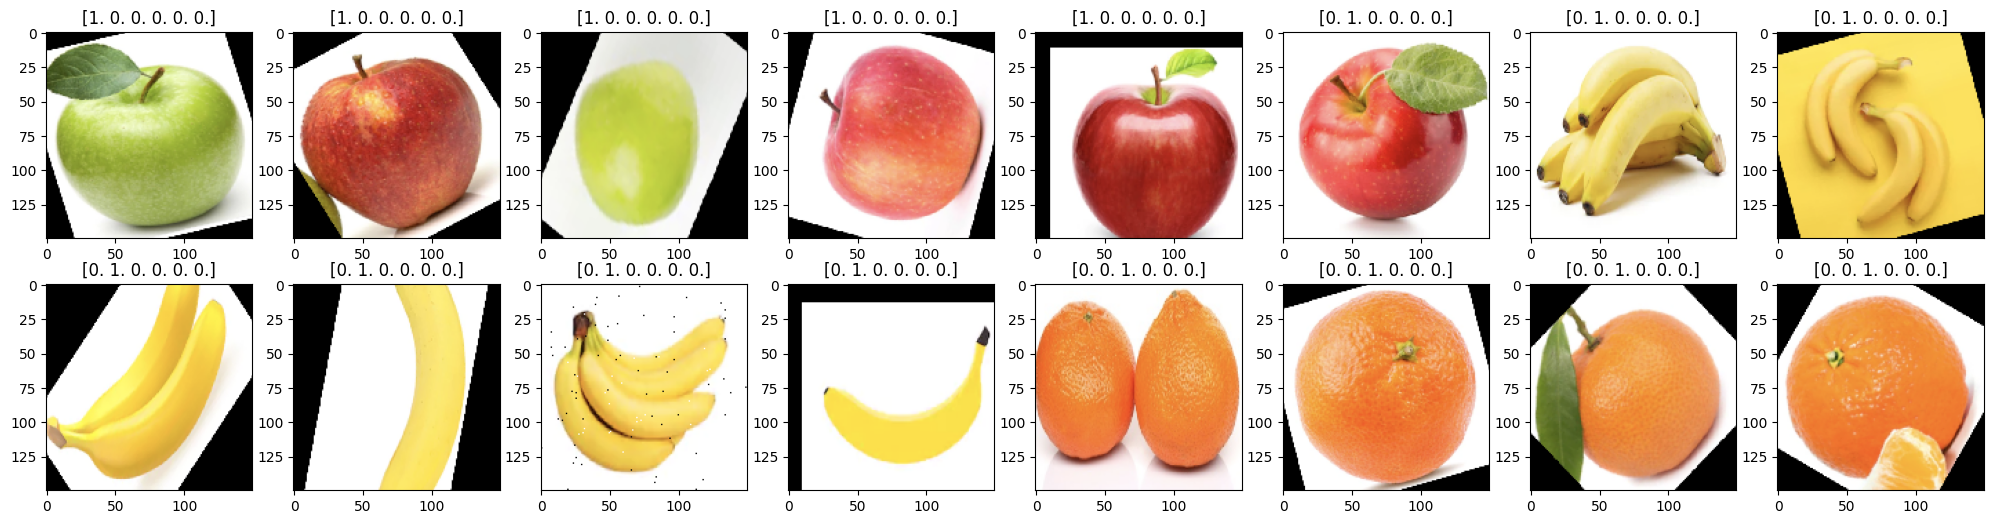

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=8,figsize=(25,6))
n = 0
idx = np.random.randint(len(train_gen.next()[0]), size=16)
for i in range(2):
  for j in range(8):
    img = train_gen.next()[0][idx[n]]
    ax[i][j].imshow(img)
    ax[i][j].set_title(train_gen.next()[1][idx[n]])
    n+=1

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data = test_gen, verbose = 1, validation_steps=10)

Epoch 1/25
20/20 [==============================] - 30s 809ms/step - loss: 1.8808 - accuracy: 0.1302 - val_loss: 1.8327 - val_accuracy: 0.0762
Epoch 2/25
20/20 [==============================] - 21s 1s/step - loss: 1.7626 - accuracy: 0.2353 - val_loss: 1.8136 - val_accuracy: 0.0762
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 1.7936 - accuracy: 0.1964 - val_loss: 1.8007 - val_accuracy: 0.0762
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 1.7826 - accuracy: 0.1984 - val_loss: 1.8084 - val_accuracy: 0.0762
Epoch 5/25
20/20 [==============================] - 17s 868ms/step - loss: 1.7628 - accuracy: 0.3544 - val_loss: 1.8488 - val_accuracy: 0.0762
Epoch 6/25
20/20 [==============================] - 17s 848ms/step - loss: 1.7658 - accuracy: 0.2413 - val_loss: 1.8518 - val_accuracy: 0.0278
Epoch 7/25
20/20 [==============================] - 17s 852ms/step - loss: 1.7192 - accuracy: 0.3214 - val_loss: 1.8305 - val_accuracy: 0.0762
Epoch 8/

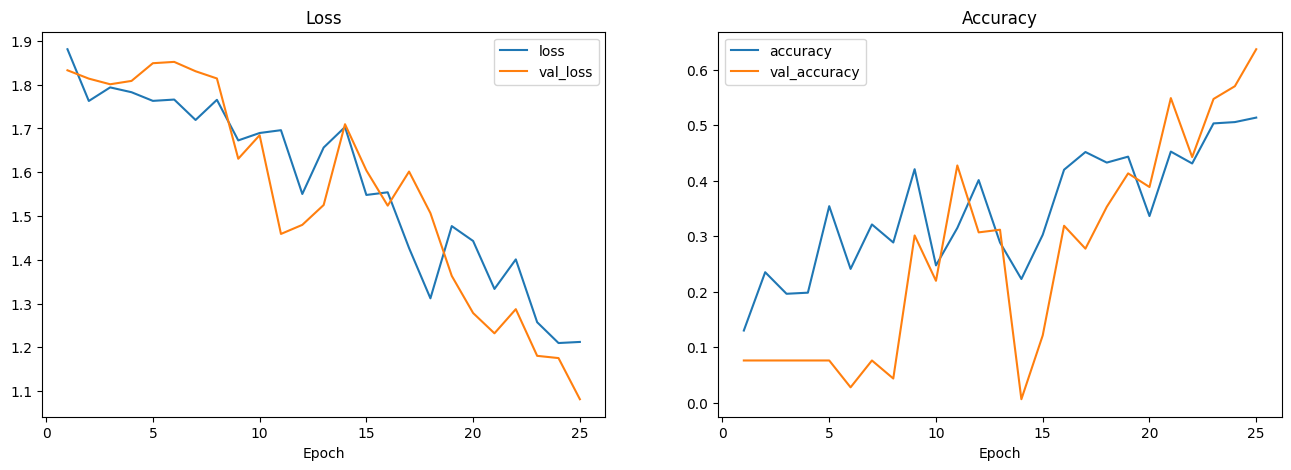

In [ ]:
import matplotlib.pyplot as plt

epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

**Using Flatten**

In [ ]:
model1 = tf.keras.models.Sequential()

model1.add(tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(150, 150, 3)))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Conv2D(128, (3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(512, activation='relu'))
model1.add(tf.keras.layers.Dense(6, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model1.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history1 = model1.fit(train_gen, epochs=25, steps_per_epoch=20, validation_data = test_gen, verbose = 1, validation_steps=10)

Epoch 1/25
20/20 [==============================] - 19s 823ms/step - loss: 3.2562 - accuracy: 0.1224 - val_loss: 1.8794 - val_accuracy: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 17s 847ms/step - loss: 1.8221 - accuracy: 0.2000 - val_loss: 1.8671 - val_accuracy: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 1.7940 - accuracy: 0.2500 - val_loss: 1.8005 - val_accuracy: 0.0000e+00
Epoch 4/25
20/20 [==============================] - 21s 1s/step - loss: 1.7907 - accuracy: 0.4099 - val_loss: 1.8018 - val_accuracy: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 1.7936 - accuracy: 0.1537 - val_loss: 1.8028 - val_accuracy: 0.0000e+00
Epoch 6/25
20/20 [==============================] - 20s 1s/step - loss: 1.7945 - accuracy: 0.1537 - val_loss: 1.8049 - val_accuracy: 0.0000e+00
Epoch 7/25
20/20 [==============================] - 20s 1s/step - loss: 1.7853 - accuracy: 0.2489 - val_loss: 1.8087 - val_accurac

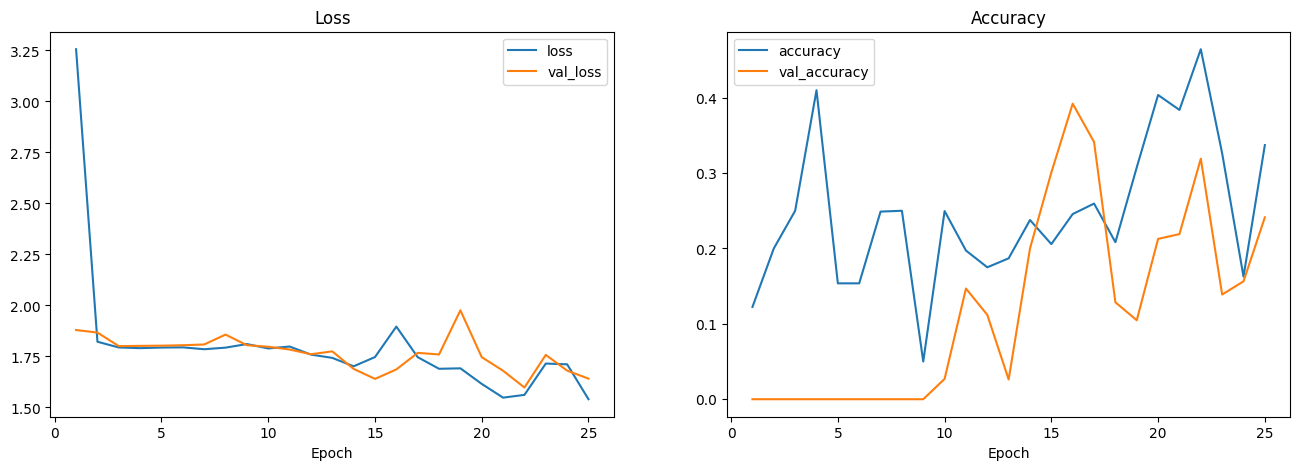

In [ ]:
import matplotlib.pyplot as plt

epoch=25

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history1.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history1.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history1.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history1.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()

### Test Image on Pooling Model

In [ ]:
import numpy as np

def prediction(file):
  img = tf.keras.utils.load_img(file, target_size=(150, 150))
  x = tf.keras.utils.img_to_array(img)/255

  plt.imshow(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  idx = np.argmax(classes)
  clas = ['fresh apple','fresh banana','fresh orange','rotten apple','rotten banana','rotten apple']
  print('Prediction is a {}'.format(clas[idx]))

In [ ]:
# !wget link_image
!wget https://i0.wp.com/writemakesmight.net/wp-content/uploads/2020/05/rotten-apple-13258722.jpg
!wget https://nurserylive.com/cdn/shop/products/nurserylive-plants-banana-g9-kela-plant-202932.jpg
!wget https://media-cldnry.s-nbcnews.com/image/upload/newscms/2020_19/1565781/food-preservation-tips-today-main-200504.jpg

--2023-09-11 06:45:41--  https://i0.wp.com/writemakesmight.net/wp-content/uploads/2020/05/rotten-apple-13258722.jpg
Resolving i0.wp.com (i0.wp.com)... 192.0.77.2
Connecting to i0.wp.com (i0.wp.com)|192.0.77.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94157 (92K) [image/jpeg]
Saving to: ‘rotten-apple-13258722.jpg’

rotten-apple-132587 100%[===================>]  91.95K  --.-KB/s    in 0.003s  

2023-09-11 06:45:42 (35.2 MB/s) - ‘rotten-apple-13258722.jpg’ saved [94157/94157]

--2023-09-11 06:45:42--  https://nurserylive.com/cdn/shop/products/nurserylive-plants-banana-g9-kela-plant-202932.jpg
Resolving nurserylive.com (nurserylive.com)... 23.227.38.65
Connecting to nurserylive.com (nurserylive.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95122 (93K) [image/jpeg]
Saving to: ‘nurserylive-plants-banana-g9-kela-plant-202932.jpg’

nurserylive-plants- 100%[===================>]  92.89K  --.-KB/s    in 0.002s  

2023

1/1 [==============================] - 0s 231ms/step
Prediction is a rotten apple


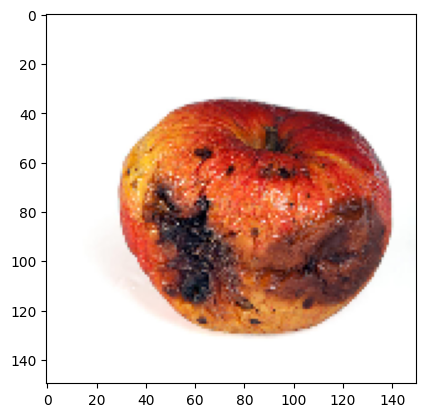

In [ ]:
prediction('rotten-apple-13258722.jpg')

1/1 [==============================] - 0s 18ms/step
Prediction is a fresh apple


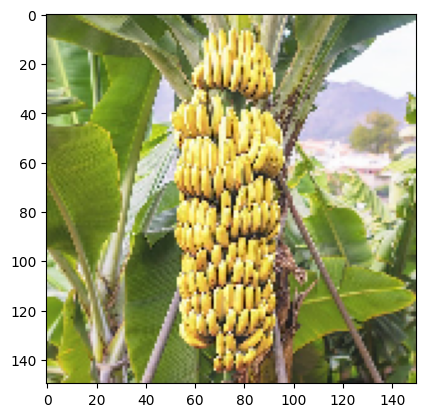

In [ ]:
prediction('nurserylive-plants-banana-g9-kela-plant-202932.jpg')

1/1 [==============================] - 0s 18ms/step
Prediction is a fresh banana


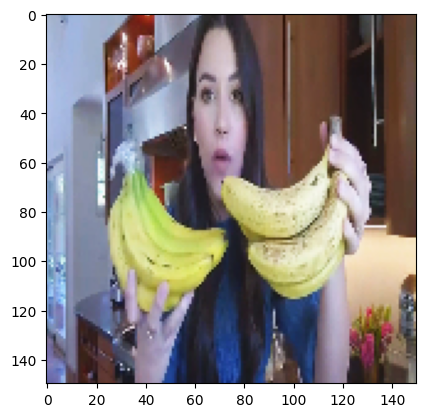

In [ ]:
prediction('food-preservation-tips-today-main-200504.jpg')

### Test image on flatten model

In [ ]:
def prediction1(file):
  img = tf.keras.utils.load_img(file, target_size=(150, 150))
  x = tf.keras.utils.img_to_array(img)/255

  plt.imshow(img)

  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  idx = np.argmax(classes)
  clas = ['fresh apple','fresh banana','fresh orange','rotten apple','rotten banana','rotten apple']
  print('Prediction is a {}'.format(clas[idx]))

1/1 [==============================] - 0s 89ms/step
Prediction is a rotten banana


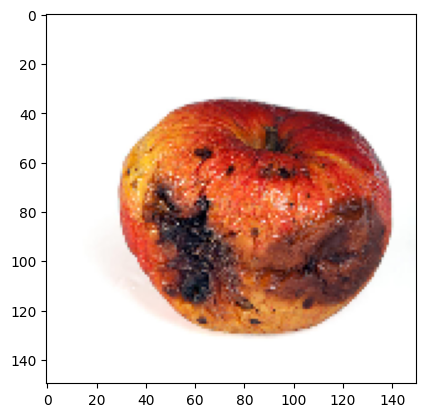

In [ ]:
prediction1('rotten-apple-13258722.jpg')

1/1 [==============================] - 0s 18ms/step
Prediction is a rotten apple


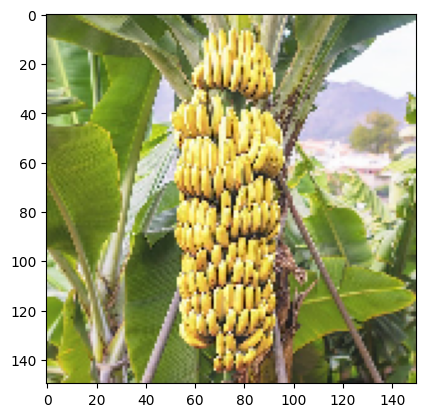

In [ ]:
prediction1('nurserylive-plants-banana-g9-kela-plant-202932.jpg')

1/1 [==============================] - 0s 19ms/step
Prediction is a rotten banana


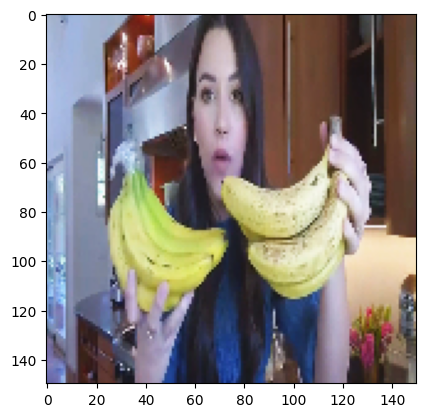

In [ ]:
prediction1('food-preservation-tips-today-main-200504.jpg')